In [15]:
#başlangıç; data, data frame imize yükleniyor. 

from sklearn.datasets import load_wine   
import pandas as pd                     

wine = load_wine(as_frame=True)

# Özellikler ve hedef
X = wine.data
y = wine.target

# Birleştirilmiş DataFrame
df = pd.concat([X, y], axis=1)

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [19]:
from sklearn.preprocessing import StandardScaler
""" 
 bazı özelliklerin değerlerinin görece büyük olmasından kaynaklı k-nn hesaplamasını 
 domine etmemesi için değerlerimizi normalize etmemiz gerekiyor
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. DataFrame'e çevir (kolon isimleri korunarak)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Hedef sütunu ekle
df = pd.concat([X_scaled_df, y], axis=1)

# 6. Göster
print(df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.251717  0.362177                      1.847920  1.013009       0  
1        -0.

In [21]:
""" 
 F parametresi ile parametrelerin etkisi kontrol ediliyor
 yüksek F parametresi o özelliğin daha belirleyici olduğunu gösteriyor
 sonraki kısımlarda düşük F değerli özellikleri elediğimizde sonucun değişip değişmediğini 
 kontrol edeceğiz
"""
from sklearn.feature_selection import f_classif
import pandas as pd

# data frame deki target sütununu hesaba katmamak için çıkartıyoruz
X = df.drop("target", axis=1)
y = df["target"]

f_values, _ = f_classif(X, y) 

# Sadece F-value içeren tablo oluşturur
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values
}).sort_values(by='F-value', ascending=False)

print(feature_scores)



                         Feature     F-value
6                     flavanoids  233.925873
12                       proline  207.920374
11  od280/od315_of_diluted_wines  189.972321
0                        alcohol  135.077624
9                color_intensity  120.664018
10                           hue  101.316795
5                  total_phenols   93.733010
1                     malic_acid   36.943425
3              alcalinity_of_ash   35.771637
8                proanthocyanins   30.271383
7           nonflavanoid_phenols   27.575417
2                            ash   13.312901
4                      magnesium   12.429584


In [21]:
#test ve train olarak ikiye ayrılıyor

from sklearn.model_selection import train_test_split

# Özellikler ve hedefi ayır
X = df.drop("target", axis=1)
y = df["target"]

# Veriyi ayır: %80 eğitim, %20 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (142, 13)
Testing Set: (36, 13)



-> k = 1
Euclidean Accuracy: 1.00
Manhattan Accuracy: 1.00

-> Confusion Matrix (Euclidean):
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

-> Confusion Matrix (Manhattan):
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


-> k = 3
Euclidean Accuracy: 1.00
Ma

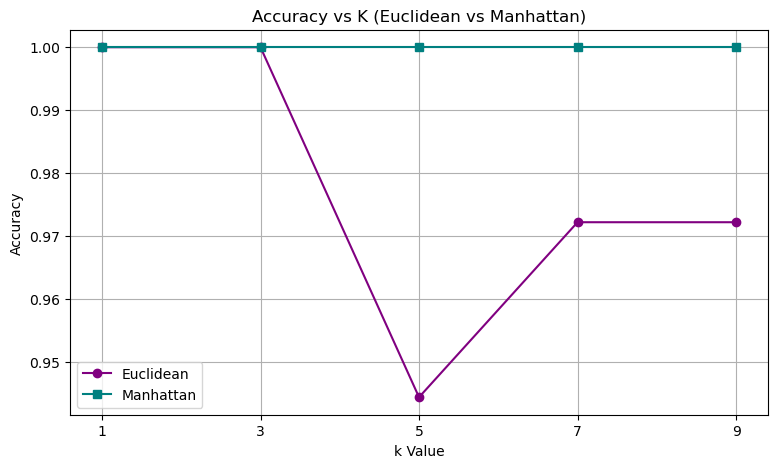

In [23]:
# k-nn algoritması ve uzaklık modelleri; bu kısımda açıklamalar fazla olacaktır

#gerekli kütüphanelerin elenmesi, grafik çizim,accuracy ve confusion matrix hesaplaması vs
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#bu iki fonksiyon, euclidian ve manhattan uzunluk fonksiyonlarını tanımlıyor
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


""" k-NN tahmin fonksiyonu
    fonksiyona, X_train ve y_train adlı eğitim verileri gönderiliyor. K-NN algoritması bir lazy learning
    metodu olmasıyla, her test verisini her training verisiyle kıyaslıyarak bir sonuç elde ediyor.
    k: farklı k değerleri için bir değişken, distance_funciton da farklı uzunluk fonksiyonlarını kullanmak
    için fonksiyona gönderiliyor. """

def knn_predict(X_train, y_train, x_test, k=1, distance_func=euclidean_distance):
    
    """bu kod parçası, test verisinin training verisindeki değerlere olan bütün uzaklıklarını hesaplıyor
     ardından training verisinin bulunduğu sınıfla birlike, bu şekilde saklanıyor:
    
    [
    (1.25, 0),
    (2.89, 1),
    (0.73, 1),
    (3.12, 2),
    ...
    ]
    
    """
    distances = []
    for i in range(len(X_train)):
        dist = distance_func(x_test, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))
    
    #distance matrixisini küçüten büyüğe sıralıyor
    distances.sort(key=lambda x: x[0]) 
    
    #en yakın 'k' kadar komşunun class bilgisini alıyor
    k_nearest_labels = [label for (_, label) in distances[:k]] 
    
    #en çok tekrar eden 1. değeri most_common değişkenine atar
    most_common = Counter(k_nearest_labels).most_common(1)
    
    #fonksiyon en çok tekrar eden sınıf değerini döndürür
    return most_common[0][0]


#farklı k değerlerini iki farklı uzunluk fonksiyonunda test edeceğiz

k_values = [1, 3, 5, 7, 9]
euclidean_accuracies = []
manhattan_accuracies = []

for k in k_values:
    
    """ Euclidean mesafe fonksiyonunu kullanarak, 3. kısımda ayırdığımız test setindeki her değer için 
        tahmin üretir ve bu tahminlerini y_pred_euc da saklar"""
    
    y_pred_euc = [knn_predict(X_train, y_train, X_test.iloc[i], k=k, distance_func=euclidean_distance)
                  for i in range(len(X_test))]

    """accuracy hesaplama satırları, y_test deki sınıf ile y_pred_euc daki tahmin edilen sınıfları 
       kıyaslıyor. ardından sonuçları euclidean_accuracie matrixinin sonuna ekliyoruz """ 
    acc_euc = accuracy_score(y_test, y_pred_euc)
    euclidean_accuracies.append(acc_euc)

    # aynı işlemler Manhattan uzalık hesaplaması için de yapılıyor
    y_pred_man = [knn_predict(X_train, y_train, X_test.iloc[i], k=k, distance_func=manhattan_distance)
                  for i in range(len(X_test))]
    acc_man = accuracy_score(y_test, y_pred_man)
    manhattan_accuracies.append(acc_man)


    """ bu kısımdan sonrası, elde edilen bilgilerden çıktı almak ve görselleştirmek üzerinedir."""
    
    print(f"\n-> k = {k}")
    print(f"Euclidean Accuracy: {acc_euc:.2f}")
    print(f"Manhattan Accuracy: {acc_man:.2f}")
    
    print("\n-> Confusion Matrix (Euclidean):")
    print(confusion_matrix(y_test, y_pred_euc))
    print(classification_report(y_test, y_pred_euc))

    print("-> Confusion Matrix (Manhattan):")
    print(confusion_matrix(y_test, y_pred_man))
    print(classification_report(y_test, y_pred_man))

# 4. Grafiği çiz
plt.figure(figsize=(9, 5))
plt.plot(k_values, euclidean_accuracies, marker='o', label='Euclidean', color='purple')
plt.plot(k_values, manhattan_accuracies, marker='s', label='Manhattan', color='teal')
plt.title("Accuracy vs K (Euclidean vs Manhattan)")
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()

In [ ]:
#